In [13]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.metrics import r2_score
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn import tree
import graphviz
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import linear_model



Decision Trees

In [2]:
#read in dataset and convert non numerical values to numerical
df = pd.read_csv("E:/internship 2022/shows.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [3]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']


In [9]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('E:/internship 2022/mydecisiontree.png')

img=pltimg.imread('E:/internship 2022/mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

InvocationException: GraphViz's executables not found

In [ ]:
print(dtree.predict([[40, 10, 7, 1]]))

print(dtree.predict([[40, 10, 6, 1]]))



confusion Matrix-- assess where errors were made

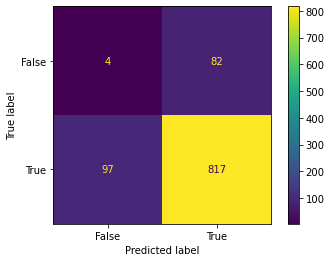

In [2]:
actual = np.random.binomial(1, 0.9, size = 1000)
predicted = np.random.binomial(1, 0.9, size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
#true negative (top-left quadrant)
#false negative (top-right quadrant)
#false positive (bottom- left quardant)
#true positive (bottom right quadrant)

In [4]:
# accuracy
Accuracy = metrics.accuracy_score(actual, predicted)

#precision
Precision = metrics.precision_score(actual, predicted)

#sensitivity recall
Sensitivity_recall = metrics.recall_score(actual, predicted)

#specificity
Specificity = metrics.recall_score(actual, predicted, pos_label=0)

#fscore
F1_score = metrics.f1_score(actual, predicted)

print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})



{'Accuracy': 0.821, 'Precision': 0.9087875417130145, 'Sensitivity_recall': 0.8938730853391685, 'Specificity': 0.046511627906976744, 'F1_score': 0.9012686155543298}


Hierarchical Clustering- unsupervised learning method for clustering data

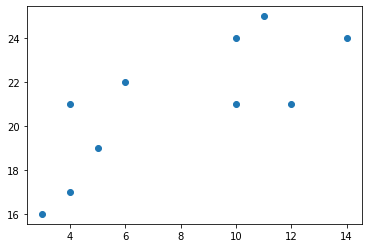

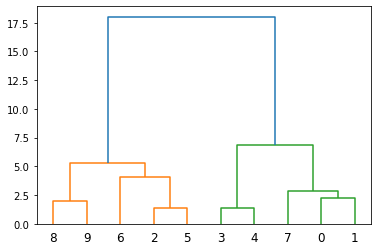

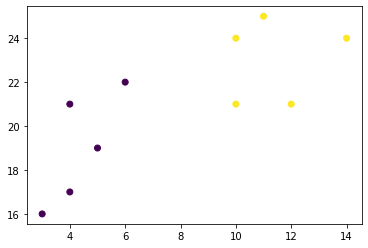

In [9]:
#creating data points
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

data = list(zip(x, y))

# linking data 
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

#cluster in a different manner
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

Logistic Regression - aims to solve classification problems and predicts categorical outcomes

In [17]:
#Reshaped for Logistic function.
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

log_odds = logr.coef_ 
odds = np.exp(log_odds)

print(odds)

[[4.03541657]]


Probability

In [19]:
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

def logit2prob(logr, X):
  log_odds = logr.coef_ * X + logr.intercept_
  odds = np.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print(logit2prob(logr, X))
#answer gives probability for each x value

[[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]
